In [ ]:
import torch

In [ ]:
w = 0.3
b = 0.9

start = 0
end = 20
step = 0.2

X = torch.arange(start, end, step).unsqueeze(dim=1)       #the unsqueeze is used to add the dimension to the X making it a column vector where each row hold a single feature
y = w * X + b

In [ ]:
X.shape

torch.Size([100, 1])

In [ ]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000],
         [1.0000],
         [1.2000],
         [1.4000],
         [1.6000],
         [1.8000]]),
 tensor([[0.9000],
         [0.9600],
         [1.0200],
         [1.0800],
         [1.1400],
         [1.2000],
         [1.2600],
         [1.3200],
         [1.3800],
         [1.4400]]))

In [ ]:
#Spliting the data into training and testing (80% and 20%)

In [ ]:
train_split = int(0.8 * len(X))
train_split

80

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [ ]:
#Q3 plotting the train_test data plot for visual

In [ ]:
import matplotlib.pyplot as plt

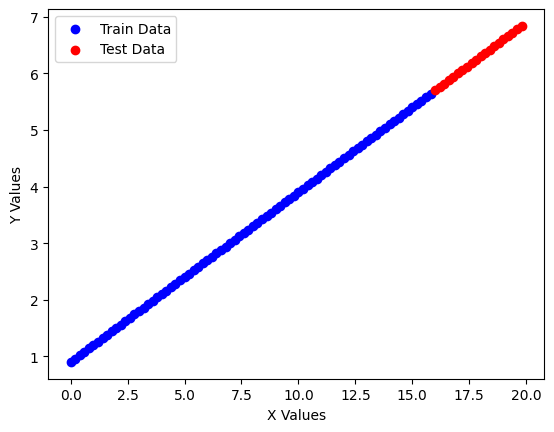

In [ ]:
plt.scatter(X_train.numpy(), y_train.numpy(), color = 'blue', label = 'Train Data')
plt.scatter(X_test.numpy(), y_test.numpy(), color='red', label='Test Data')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

In [ ]:
from torch import nn

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))
    self.bias = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [ ]:
torch.manual_seed(43)
model = LinearRegression()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([0.4540], requires_grad=True),
 Parameter containing:
 tensor([0.1965], requires_grad=True)]

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([0.4540])), ('bias', tensor([0.1965]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(43)
epochs = 300

train_loss_values=[]
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 20 == 0 :
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss : {loss} | MAE Test Loss : {test_loss}")

Epoch: 0 | MAE Train Loss : 0.7225882411003113 | MAE Test Loss : 1.9333314895629883
Epoch: 20 | MAE Train Loss : 0.2970018982887268 | MAE Test Loss : 0.48049283027648926
Epoch: 40 | MAE Train Loss : 0.2912765145301819 | MAE Test Loss : 0.4176073968410492
Epoch: 60 | MAE Train Loss : 0.2878090441226959 | MAE Test Loss : 0.40941181778907776
Epoch: 80 | MAE Train Loss : 0.28435689210891724 | MAE Test Loss : 0.4062528610229492
Epoch: 100 | MAE Train Loss : 0.28088054060935974 | MAE Test Loss : 0.4030943810939789
Epoch: 120 | MAE Train Loss : 0.27741894125938416 | MAE Test Loss : 0.39489883184432983
Epoch: 140 | MAE Train Loss : 0.27396106719970703 | MAE Test Loss : 0.3917399048805237
Epoch: 160 | MAE Train Loss : 0.27048465609550476 | MAE Test Loss : 0.38858145475387573
Epoch: 180 | MAE Train Loss : 0.2670287489891052 | MAE Test Loss : 0.3803858458995819
Epoch: 200 | MAE Train Loss : 0.26356497406959534 | MAE Test Loss : 0.37722742557525635
Epoch: 220 | MAE Train Loss : 0.26008862257003784

In [ ]:
#visualizing what have we actually done:

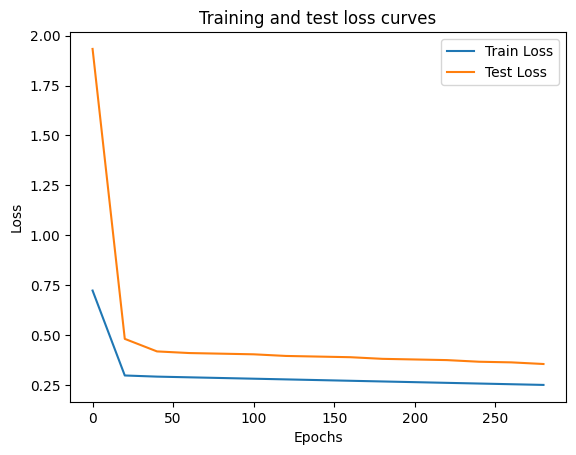

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
print(f"The model learned the following values for weight and bias:\n")
print(f"{model.state_dict()}\n")
print(f"and the original value was \n Weight:{w} and Bias:{b}")

The model learned the following values for weight and bias:

OrderedDict([('weight', tensor([0.3527])), ('bias', tensor([0.3107]))])

and the original value was 
 Weight:0.3 and Bias:0.9


In [ ]:
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)

In [ ]:
y_preds

tensor([[5.9544],
        [6.0249],
        [6.0955],
        [6.1660],
        [6.2365],
        [6.3071],
        [6.3776],
        [6.4482],
        [6.5187],
        [6.5893],
        [6.6598],
        [6.7304],
        [6.8009],
        [6.8714],
        [6.9420],
        [7.0125],
        [7.0831],
        [7.1536],
        [7.2242],
        [7.2947]])

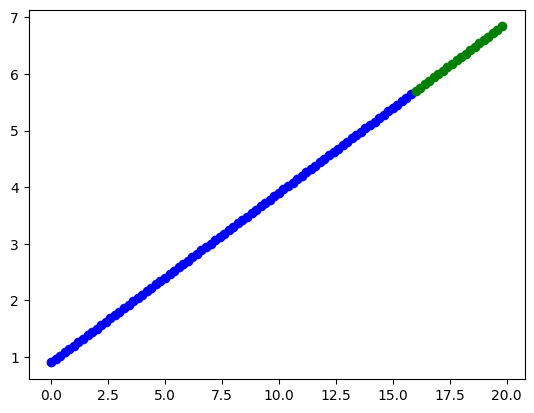

In [ ]:
plt.scatter(X_train, y_train, color="blue", label="Train")
plt.scatter(X_test, y_test, color="green", label="Test")

In [ ]:
from pathlib import Path

In [ ]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "PyTorch Workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/PyTorch Workflow.pth


In [ ]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(f"loaded Model : {loaded_model}")

loaded Model : LinearRegression()


In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])